# Homework
- Exercise 3 (p.332, Chap.8), 5 (p.332, Chap.8), 8 (p.333, Chap.8), 9 (p.334, Chap.8) and 10 (p.334, Chap.8)

# Favour Eledu

### Ex. 3

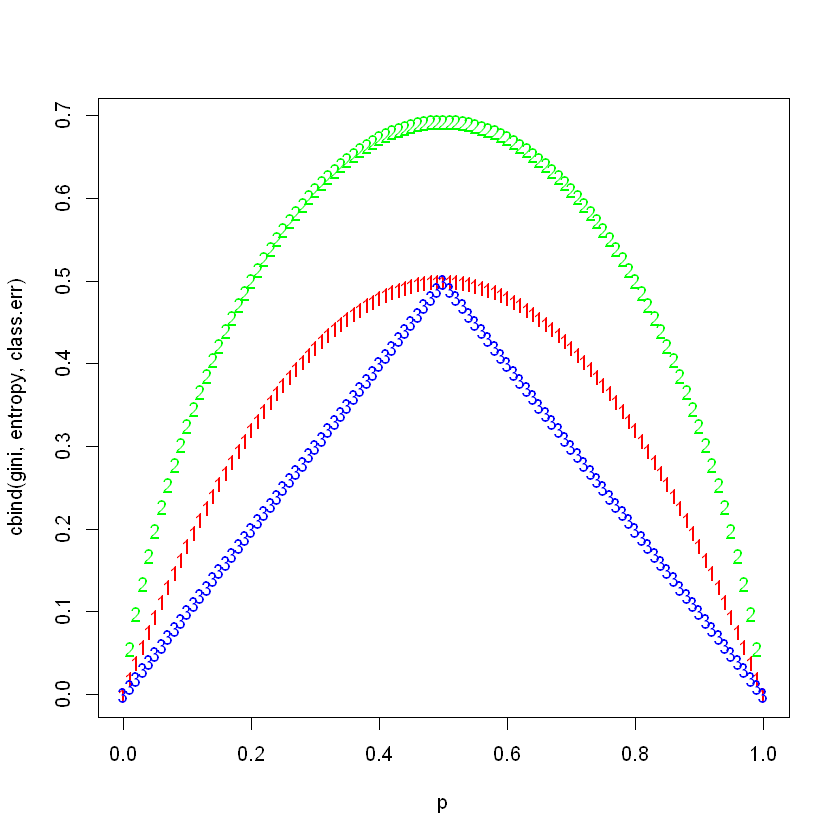

In [1]:
p = seq(0, 1, 0.01)
gini = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
class.err = 1 - pmax(p, 1 - p)
matplot(p, cbind(gini, entropy, class.err), col = c("red", "green", "blue"))

### Ex. 5

In [5]:
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

##### By Majority

In [7]:
sum(p >= 0.5) > sum(p < 0.5)

[1] TRUE

##### By Average

In [8]:
mean(p)

[1] 0.45

### Ex. 8

### a. 
Split the data set into a training set and a test set.

In [9]:
# define the training set
library(ISLR)
attach(Carseats)
set.seed(1)

train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]

Warning message:
"package 'ISLR' was built under R version 3.6.3"

### b. 
Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

In [10]:
# fit the model
library(tree)
tree.carseats = tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)

Warning message:
"package 'tree' was built under R version 3.6.3"


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

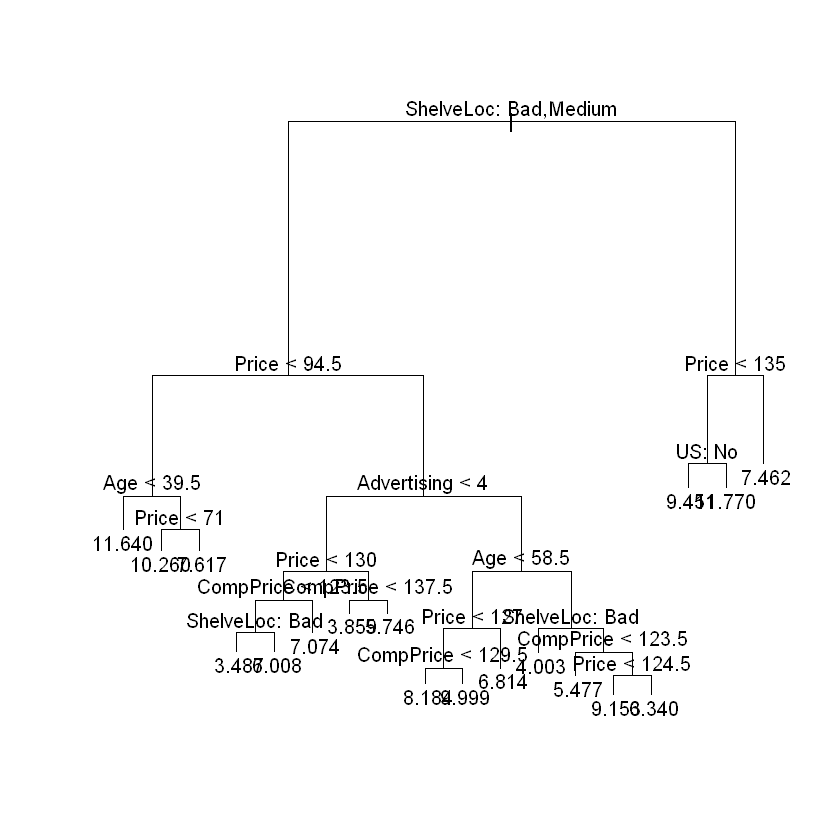

In [11]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [12]:
# apply the test set
pred.carseats = predict(tree.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.carseats)^2)

[1] 4.922039

### c.

Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

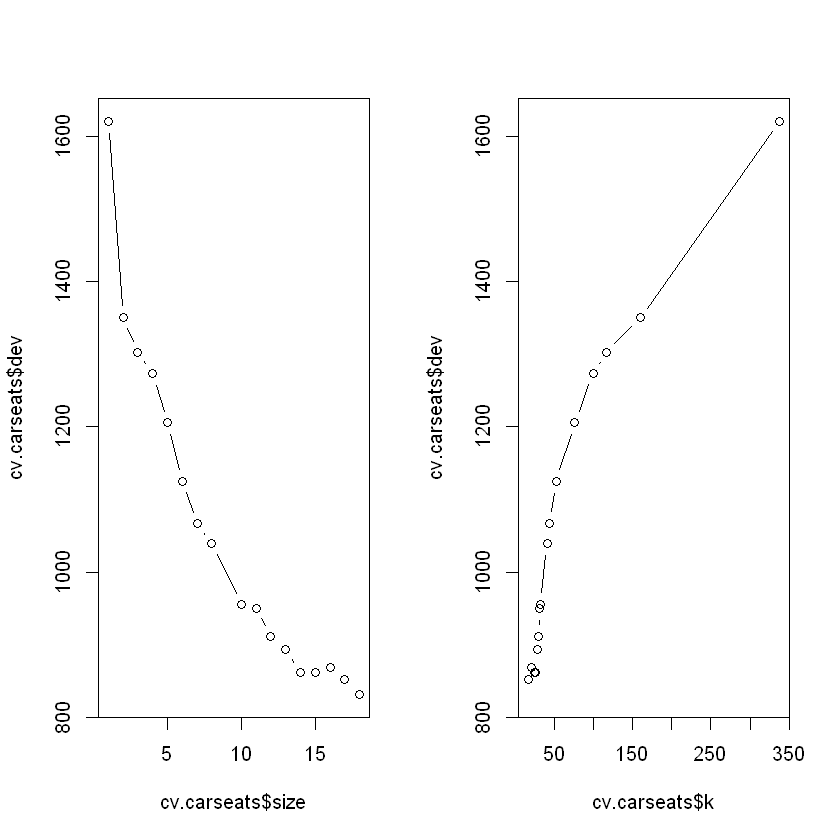

In [13]:
cv.carseats = cv.tree(tree.carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = "b")
plot(cv.carseats$k, cv.carseats$dev, type = "b")

### d. 

Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine
which variables are most important.

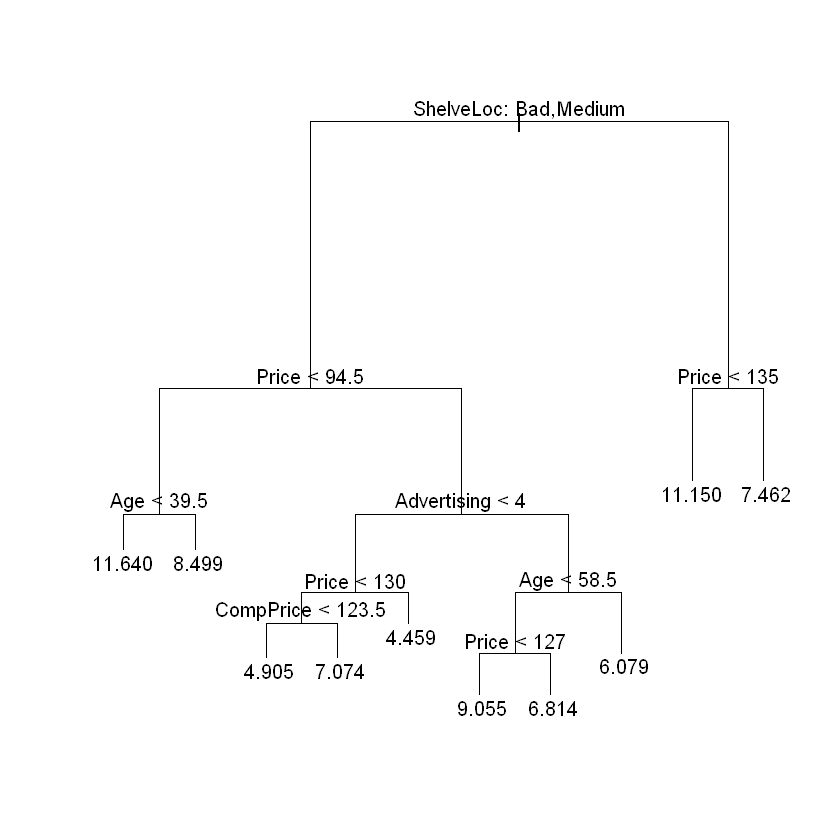

In [14]:
# Best size = 9
pruned.carseats = prune.tree(tree.carseats, best = 9)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

In [15]:
pred.pruned = predict(pruned.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.pruned)^2)

[1] 4.918134

In [20]:
# install.packages('randomForest')
library(randomForest)

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\feledu1\AppData\Local\Temp\RtmpGqmwql\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [21]:
bag.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, 
    importance = T)
bag.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - bag.pred)^2)

[1] 2.657296

In [22]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,23.07909904,171.185734
Income,2.82081527,94.079825
Advertising,11.43295625,99.098941
Population,-3.92119532,59.818905
Price,54.24314632,505.887016
ShelveLoc,46.26912996,361.962753
Age,14.24992212,159.740422
Education,-0.07662320,46.738585
Urban,0.08530119,8.453749
US,4.34349223,15.157608


### e.
Use random forests to analyze this data. What test MSE do you
obtain? Use the importance() function to determine which variables
aremost important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.


In [23]:
rf.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 5, ntree = 500, 
    importance = T)
rf.pred = predict(rf.carseats, Carseats.test)
mean((Carseats.test$Sales - rf.pred)^2)

[1] 2.701665

In [24]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,19.8160444,162.73603
Income,2.8940268,106.96093
Advertising,11.6799573,106.30923
Population,-1.6998805,79.04937
Price,46.3454015,448.33554
ShelveLoc,40.4412189,334.33610
Age,12.5440659,169.06125
Education,1.0762096,55.87510
Urban,0.5703583,13.21963
US,5.8799999,25.59797


In this case, random forest worsens the MSE on test set to 2.87. Changing m varies test MSE between 2.6 to 3. We again see that Price, ShelveLoc and CompPrice are three most important predictors of Sale.

### Ex. 9


### a. 
Create a training set containing a random sample of 800 observations,
and a test set containing the remaining observations.

In [25]:
library(ISLR)
attach(OJ)
set.seed(1013)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

### b. 
Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?

In [26]:
library(tree)
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "SalePriceMM"  
Number of terminal nodes:  7 
Residual mean deviance:  0.7564 = 599.8 / 793 
Misclassification error rate: 0.1612 = 129 / 800 

The tree only uses two variables: LoyalCH and PriceDiff. It has 7 terminal nodes. Training error rate (misclassification error) for the tree is 0.162.

### c.
Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.

In [29]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1069.00 CH ( 0.61125 0.38875 )  
   2) LoyalCH < 0.5036 344  407.30 MM ( 0.27907 0.72093 )  
     4) LoyalCH < 0.276142 163  121.40 MM ( 0.12270 0.87730 ) *
     5) LoyalCH > 0.276142 181  246.30 MM ( 0.41989 0.58011 )  
      10) PriceDiff < 0.065 75   75.06 MM ( 0.20000 0.80000 ) *
      11) PriceDiff > 0.065 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 456  366.30 CH ( 0.86184 0.13816 )  
     6) LoyalCH < 0.753545 189  224.30 CH ( 0.71958 0.28042 )  
      12) ListPriceDiff < 0.235 79  109.40 MM ( 0.48101 0.51899 )  
        24) SalePriceMM < 1.64 22   20.86 MM ( 0.18182 0.81818 ) *
        25) SalePriceMM > 1.64 57   76.88 CH ( 0.59649 0.40351 ) *
      13) ListPriceDiff > 0.235 110   75.81 CH ( 0.89091 0.10909 ) *
     7) LoyalCH > 0.753545 267   85.31 CH ( 0.96255 0.03745 ) *

Let's pick terminal node labeled “10)”. 
The splitting variable at this node is PriceDiff. The splitting value of this node is 0.06. 
There are 75 points in the subtree below this node. 
The deviance for all points contained in region below this node is 75.06. 
(*) in the line denotes that this is in fact a terminal node.
The prediction at this node is Sales = MM. 
About 20% points in this node have CH as value of Sales. Remaining 80% points have MM as value of Sales.

### d.
Create a plot of the tree, and interpret the results.

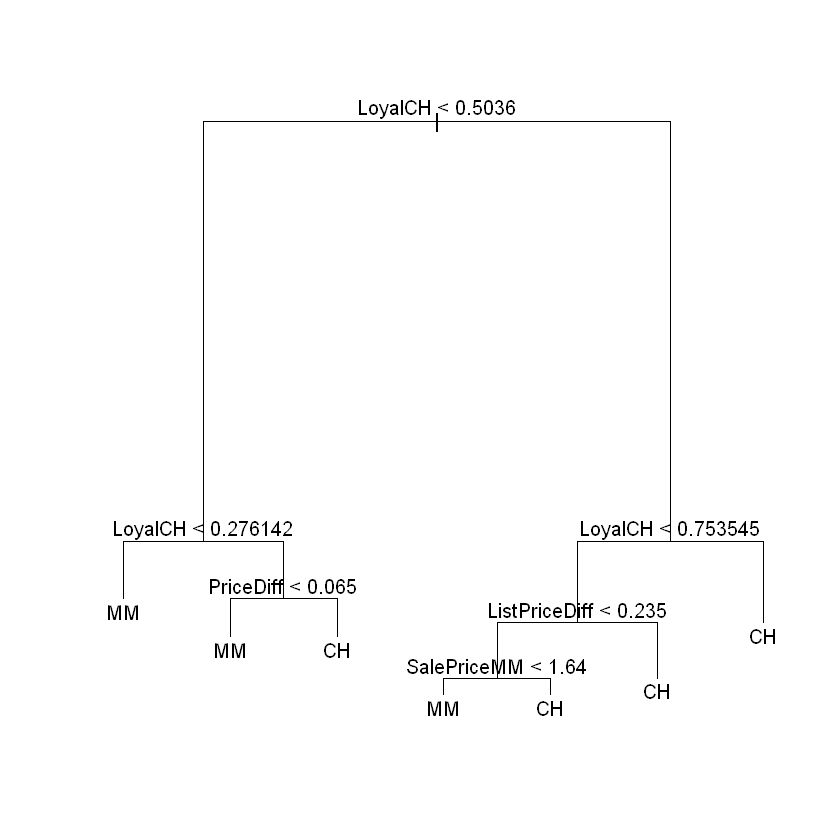

In [30]:
plot(oj.tree)
text(oj.tree, pretty = 0)

LoyalCH  is the most important variable of the tree, in fact top 3 nodes contain LoyalCH. If LoyalCH<0.27, the tree predicts MM. If LoyalCH>0.76, the tree predicts CH. For intermediate values of LoyalCH, the decision also depends on the value of PriceDiff.

### e.
Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [31]:
oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 149  15
  MM  30  76

### f.
Apply the cv.tree() function to the training set in order to
determine the optimal tree size.

In [33]:
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

### g
Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

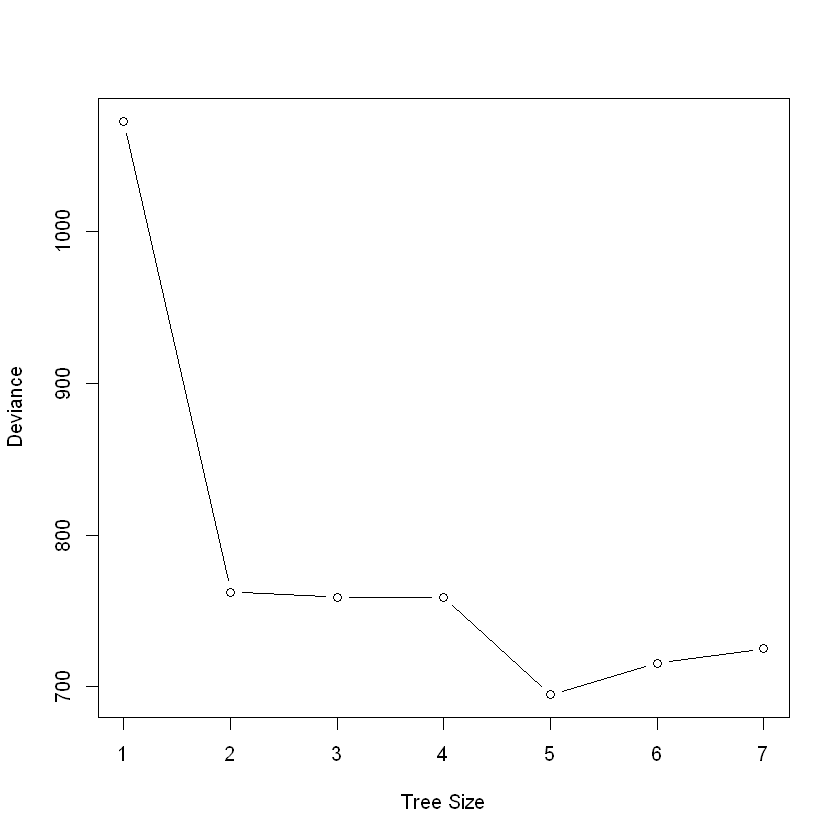

In [34]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

### h 
Which tree size corresponds to the lowest cross-validated classification
error rate?

Size 5

### i
 Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.


In [36]:
oj.pruned = prune.tree(oj.tree, best = 6)

In [37]:
oj.pruned

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1069.00 CH ( 0.61125 0.38875 )  
   2) LoyalCH < 0.5036 344  407.30 MM ( 0.27907 0.72093 )  
     4) LoyalCH < 0.276142 163  121.40 MM ( 0.12270 0.87730 ) *
     5) LoyalCH > 0.276142 181  246.30 MM ( 0.41989 0.58011 )  
      10) PriceDiff < 0.065 75   75.06 MM ( 0.20000 0.80000 ) *
      11) PriceDiff > 0.065 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 456  366.30 CH ( 0.86184 0.13816 )  
     6) LoyalCH < 0.753545 189  224.30 CH ( 0.71958 0.28042 )  
      12) ListPriceDiff < 0.235 79  109.40 MM ( 0.48101 0.51899 ) *
      13) ListPriceDiff > 0.235 110   75.81 CH ( 0.89091 0.10909 ) *
     7) LoyalCH > 0.753545 267   85.31 CH ( 0.96255 0.03745 ) *

### j
Compare the training error rates between the pruned and unpruned
trees. Which is higher?


In [38]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = 12L)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7701 = 611.5 / 794 
Misclassification error rate: 0.175 = 140 / 800 

Misclassification error of pruned tree is greater than that of original tree — 0.175.

### k.
 Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [40]:
pred.unpruned = predict(oj.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.1666667

In [41]:
pred.pruned = predict(oj.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.2

Pruned trees have higer test error rate of 0.2 while unpruned have lower test error rates of 0.16

# Ex. 10

### (a) 
Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.

In [1]:
library(ISLR)
sum(is.na(Hitters$Salary))

Warning message:
"package 'ISLR' was built under R version 3.6.3"

[1] 59

In [2]:
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
sum(is.na(Hitters$Salary))

[1] 0

In [3]:
Hitters$Salary = log(Hitters$Salary)

### (b) 
Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.

In [4]:
train = 1:200

In [5]:
train

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200

In [93]:
Hitters

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague


In [6]:
Hitters.train = Hitters[train, ]
Hitters.test = Hitters[-train, ]

In [7]:
Hitters.train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,4.248495,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,4.605170,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,4.317488,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,7.003065,A
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,6.248319,A


### (c) 
Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

In [8]:
# install.packages('gbm')
library(gbm)

Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8


### (d) 
Produce a plot with different shrinkage values on the x-axis and
the corresponding test set MSE on the y-axis.

In [9]:
set.seed(1)
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows

In [10]:
lambdas

[1] 1.000000e-10 1.258925e-10 1.584893e-10 1.995262e-10 2.511886e-10
 [6] 3.162278e-10 3.981072e-10 5.011872e-10 6.309573e-10 7.943282e-10
[11] 1.000000e-09 1.258925e-09 1.584893e-09 1.995262e-09 2.511886e-09
[16] 3.162278e-09 3.981072e-09 5.011872e-09 6.309573e-09 7.943282e-09
[21] 1.000000e-08 1.258925e-08 1.584893e-08 1.995262e-08 2.511886e-08
[26] 3.162278e-08 3.981072e-08 5.011872e-08 6.309573e-08 7.943282e-08
[31] 1.000000e-07 1.258925e-07 1.584893e-07 1.995262e-07 2.511886e-07
[36] 3.162278e-07 3.981072e-07 5.011872e-07 6.309573e-07 7.943282e-07
[41] 1.000000e-06 1.258925e-06 1.584893e-06 1.995262e-06 2.511886e-06
[46] 3.162278e-06 3.981072e-06 5.011872e-06 6.309573e-06 7.943282e-06
[51] 1.000000e-05 1.258925e-05 1.584893e-05 1.995262e-05 2.511886e-05
[56] 3.162278e-05 3.981072e-05 5.011872e-05 6.309573e-05 7.943282e-05
[61] 1.000000e-04 1.258925e-04 1.584893e-04 1.995262e-04 2.511886e-04
[66] 3.162278e-04 3.981072e-04 5.011872e-04 6.309573e-04 7.943282e-04
[71] 1.000000e-03 1.258925e-03 1.584893e-03 1.995262e-03 2.511886e-03
[76] 3.162278e-03 3.981072e-03 5.011872e-03 6.309573e-03 7.943282e-03
[81] 1.000000e-02 1.258925e-02 1.584893e-02 1.995262e-02 2.511886e-02
[86] 3.162278e-02 3.981072e-02 5.011872e-02 6.309573e-02 7.943282e-02
[91] 1.000000e-01 1.258925e-01 1.584893e-01 1.995262e-01 2.511886e-01
[96] 3.162278e-01 3.981072e-01 5.011872e-01 6.309573e-01

In [11]:
length.lambdas = length(lambdas)

In [12]:
length.lambdas

[1] 99

In [13]:
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)

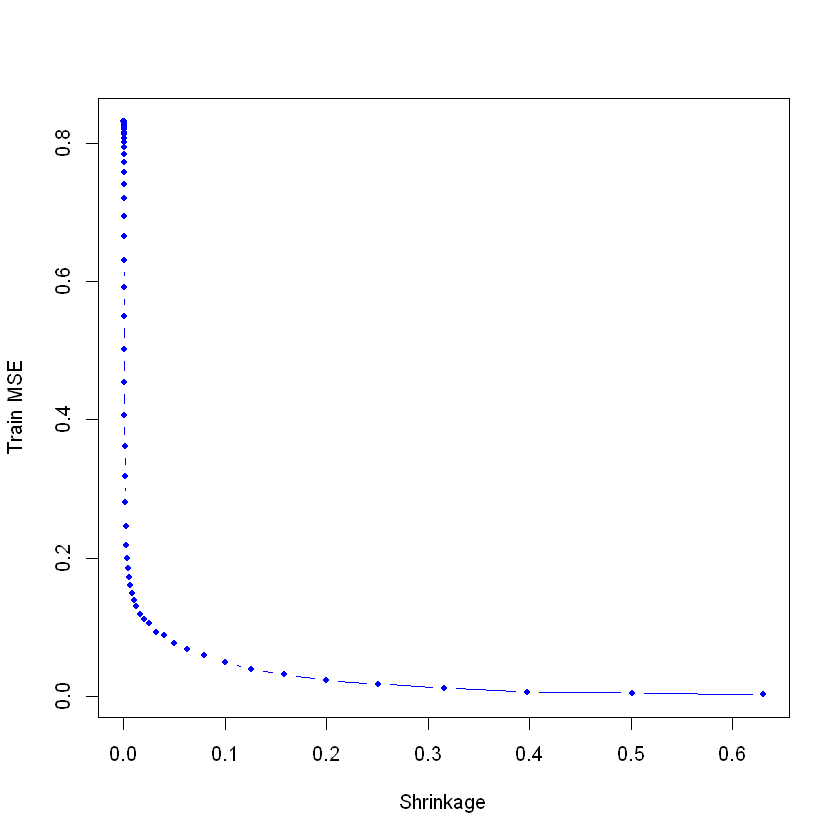

In [14]:
for (i in 1:length.lambdas) {
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

plot(lambdas, train.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", 
    col = "blue", pch = 20)

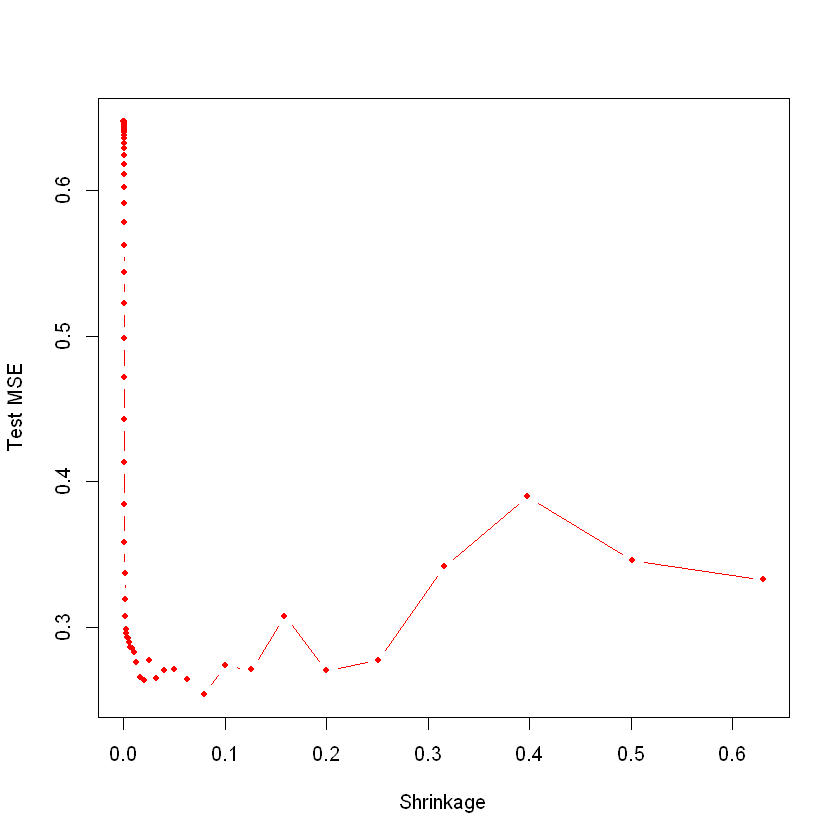

In [15]:
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "Test MSE", 
    col = "red", pch = 20)

In [16]:
min(test.errors)

[1] 0.2540265

In [17]:
lambdas[which.min(test.errors)]

[1] 0.07943282

lambda min = 0.079

### e.

In [18]:
lm.fit = lm(Salary ~ ., data = Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)

[1] 0.4917959

In [19]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


In [20]:
set.seed(1)
x = model.matrix(Salary ~ ., data = Hitters.train)
y = Hitters.train$Salary
x.test = model.matrix(Salary ~ ., data = Hitters.test)
lasso.fit = glmnet(x, y, alpha = 1)
lasso.pred = predict(lasso.fit, s = 0.01, newx = x.test)
mean((Hitters.test$Salary - lasso.pred)^2)

[1] 0.4700537

### f. 

,var,rel.inf
CAtBat,CAtBat,16.4028631
CRuns,CRuns,15.0957847
PutOuts,PutOuts,9.4543457
CWalks,CWalks,6.7508573
CRBI,CRBI,6.4133341
CHmRun,CHmRun,6.0778920
Walks,Walks,6.0434466
Years,Years,5.9694890
Hits,Hits,4.9492273
Assists,Assists,4.5706789


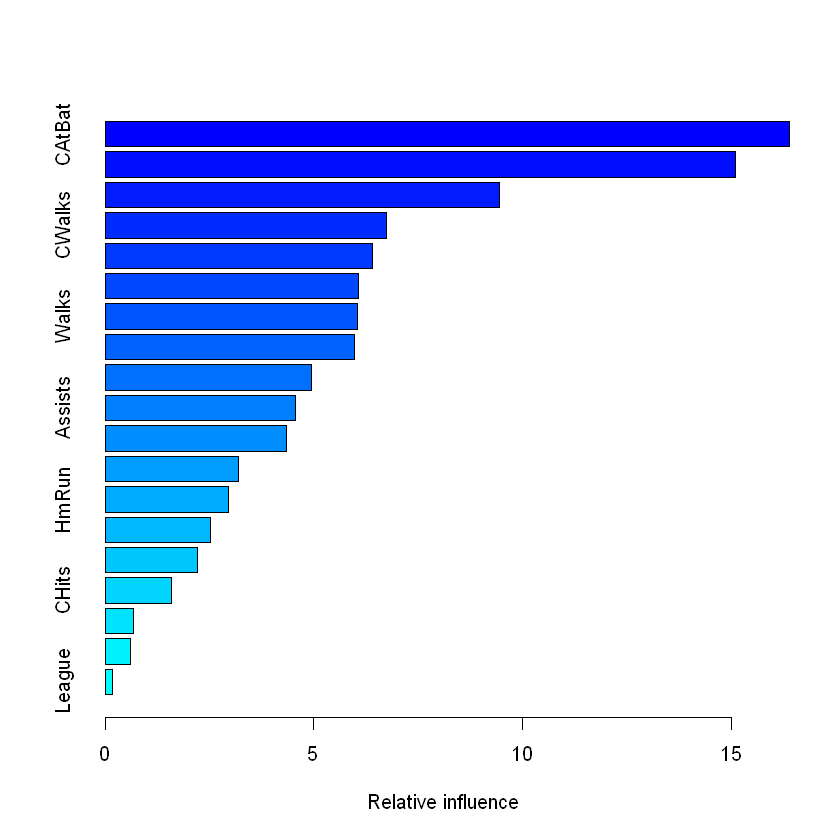

In [21]:
boost.best = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
    n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.best)

CAtBat , CRBI and CWalks are three most important variables in that order.

### g.

In [22]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [23]:
set.seed(2)
rf.hitters = randomForest(Salary ~ ., data = Hitters.train, ntree = 500, mtry = 19)
rf.pred = predict(rf.hitters, Hitters.test)
mean((Hitters.test$Salary - rf.pred)^2)

[1] 0.2284399

Test MSE for bagging is about 0.23, which is slightly lower than the best test MSE for boosting.